In [2]:
# IMPORTS
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# **CONFIG BLOCK (Learning Rate: 0.1)**

In [4]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image"  
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.1
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15

# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING**

In [5]:
# DATA PREPROCESSING 
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# split validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


# BUILD VGG16 FROM SCRATCH 
model = Sequential([
    # Block 1
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 2
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 3
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 4
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 5
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Fully connected
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])


#  COMPILE 
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#  TRAIN 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)


Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763099988.587427      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1763099995.016833     129 service.cc:148] XLA service 0x7fd71c01c240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763099995.017402     129 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763099995.745915     129 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1763100016.111168     129 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.3197 - loss: nan

77/77 ━━━━━━━━━━━━━━━━━━━━ 68s 549ms/step - accuracy: 0.3197 - loss: nan - val_accuracy: 0.3165 - val_loss: nan
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.3366 - loss: nan - val_accuracy: 0.3165 - val_loss: nan
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.3037 - loss: nan - val_accuracy: 0.3165 - val_loss: nan
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.3154 - loss: nan - val_accuracy: 0.3165 - val_loss: nan


# **EVALUATION AND METRICS**

55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.0672 - loss: nan

 Test Accuracy: 31.66%
 Test Loss: nan
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.3235    1.0000    0.4889       562
         Normal     0.0000    0.0000    0.0000       625
Viral Pneumonia     0.0000    0.0000    0.0000       550

       accuracy                         0.3235      1737
      macro avg     0.1078    0.3333    0.1630      1737
   weighted avg     0.1047    0.3235    0.1582      1737



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 800x600 with 0 Axes>

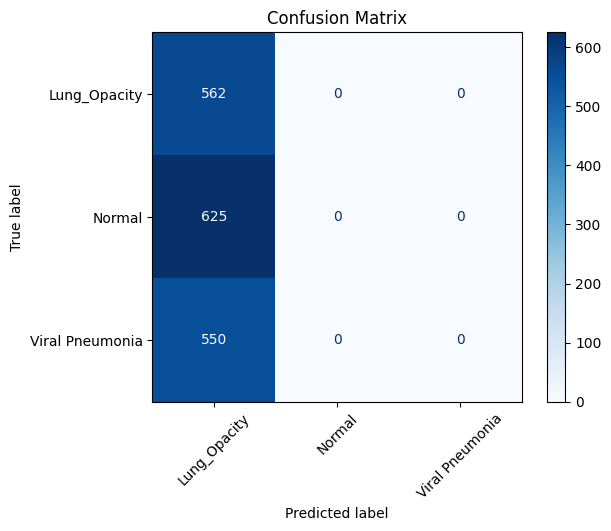

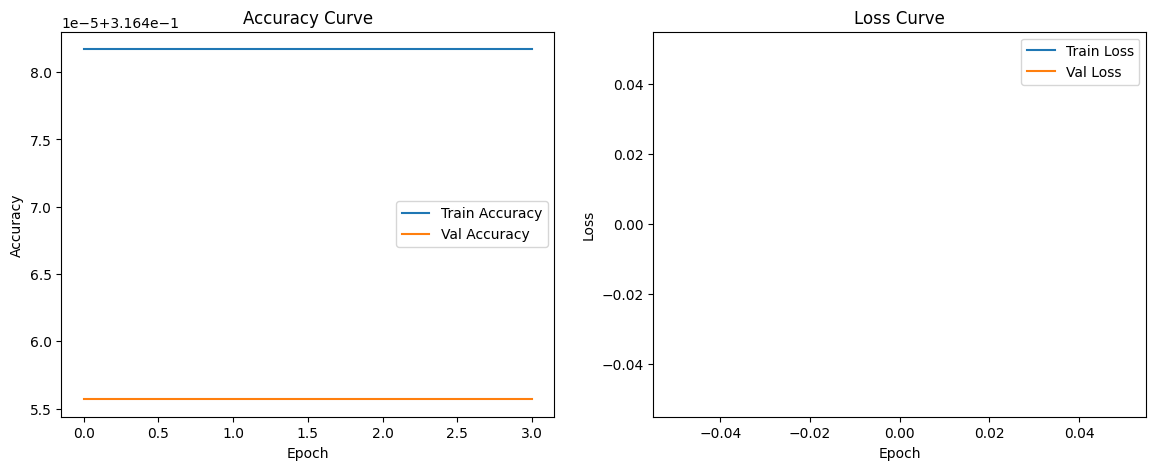

In [8]:
#  EVALUATE 
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

#  METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()

#  PLOTS 
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



# **CONFIG BLOCK (Learning Rate: 0.000001)**

In [9]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image" 
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.000001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15

# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING**

In [10]:
# DATA PREPROCESSING 
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# split validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


#  BUILD VGG16 FROM SCRATCH 
model = Sequential([
    
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

   
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

   
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])


# COMPILE 
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.3592 - loss: 1.0984

77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 431ms/step - accuracy: 0.3593 - loss: 1.0984 - val_accuracy: 0.3596 - val_loss: 1.0978
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 296ms/step - accuracy: 0.3940 - loss: 1.0975 - val_accuracy: 0.3596 - val_loss: 1.0966
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 293ms/step - accuracy: 0.3579 - loss: 1.0963 - val_accuracy: 0.3596 - val_loss: 1.0937
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 294ms/step - accuracy: 0.3679 - loss: 1.0928 - val_accuracy: 0.3596 - val_loss: 1.0844
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.3721 - loss: 1.0793

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 365ms/step - accuracy: 0.3726 - loss: 1.0791 - val_accuracy: 0.5627 - val_loss: 1.0258
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.5741 - loss: 0.9875

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 353ms/step - accuracy: 0.5745 - loss: 0.9867 - val_accuracy: 0.7463 - val_loss: 0.7202
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.6908 - loss: 0.7087

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 364ms/step - accuracy: 0.6911 - loss: 0.7082 - val_accuracy: 0.7612 - val_loss: 0.5928
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.7437 - loss: 0.6013

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 355ms/step - accuracy: 0.7437 - loss: 0.6014 - val_accuracy: 0.7687 - val_loss: 0.5694
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.7638 - loss: 0.5576

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 365ms/step - accuracy: 0.7637 - loss: 0.5579 - val_accuracy: 0.7808 - val_loss: 0.5509
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.7691 - loss: 0.5523

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 354ms/step - accuracy: 0.7691 - loss: 0.5524 - val_accuracy: 0.7911 - val_loss: 0.5338
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.7845 - loss: 0.5135

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 364ms/step - accuracy: 0.7843 - loss: 0.5140 - val_accuracy: 0.7946 - val_loss: 0.5220
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.7721 - loss: 0.5520

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 354ms/step - accuracy: 0.7721 - loss: 0.5518 - val_accuracy: 0.7992 - val_loss: 0.5119
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 293ms/step - accuracy: 0.7790 - loss: 0.5362 - val_accuracy: 0.7980 - val_loss: 0.5102
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.7925 - loss: 0.5128

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 364ms/step - accuracy: 0.7925 - loss: 0.5128 - val_accuracy: 0.8072 - val_loss: 0.4970
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 300ms/step - accuracy: 0.7801 - loss: 0.5170 - val_accuracy: 0.8067 - val_loss: 0.4899
Epoch 16/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 295ms/step - accuracy: 0.8016 - loss: 0.4950 - val_accuracy: 0.8061 - val_loss: 0.4823
Epoch 17/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.7775 - loss: 0.5225

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 365ms/step - accuracy: 0.7777 - loss: 0.5222 - val_accuracy: 0.8119 - val_loss: 0.4763
Epoch 18/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.7911 - loss: 0.5024

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 365ms/step - accuracy: 0.7912 - loss: 0.5023 - val_accuracy: 0.8130 - val_loss: 0.4729
Epoch 19/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.8018 - loss: 0.4844 - val_accuracy: 0.8090 - val_loss: 0.4767
Epoch 20/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.8016 - loss: 0.4952 - val_accuracy: 0.8021 - val_loss: 0.4838


# **EVALUATION AND METRICS**

55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.7863 - loss: 0.4854

 Test Accuracy: 81.46%
 Test Loss: 0.4467
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.7715    0.7989    0.7850       562
         Normal     0.8129    0.7232    0.7655       625
Viral Pneumonia     0.8581    0.9345    0.8947       550

       accuracy                         0.8146      1737
      macro avg     0.8142    0.8189    0.8150      1737
   weighted avg     0.8138    0.8146    0.8127      1737



<Figure size 800x600 with 0 Axes>

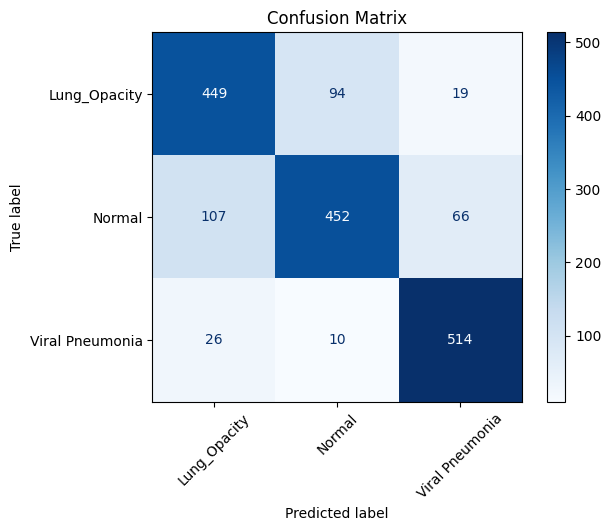

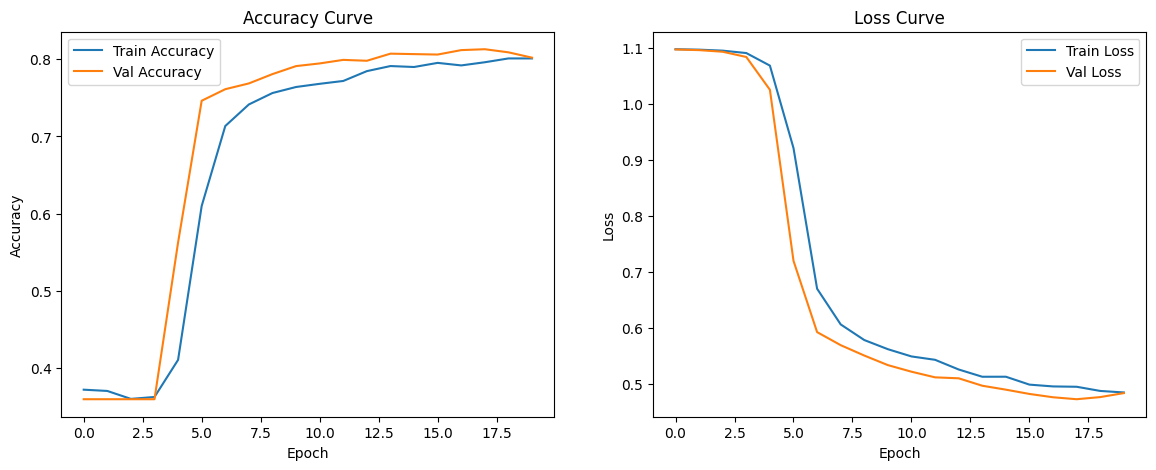

In [11]:
#  EVALUATE 
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()

#  PLOTS 
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()